In [1]:
# Import required Packages ( Add all package import here)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pwd

'C:\\Users\\nidhi\\Desktop\\CIS8005-DataProgramming\\TermProject'

## Read dataset

In [3]:
# Read dataset
df_HRData = pd.read_csv("HR_Data.csv", header = 0)
df_HRData

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188,394,city_73,0.754,NaN,Has relevant experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,29,0
19189,7683,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,NaN,1,10,1
19190,22849,city_116,0.743,NaN,Has relevant experience,no_enrollment,NaN,NaN,NaN,50-99,Pvt Ltd,never,12,0
19191,17189,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,4,43,1


## Look for null values in dataset

In [4]:
df_HRData.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4519
relevant_experience          0
enrolled_university        386
education_level            462
major_discipline          2817
experience                  66
company_size              5953
company_type              6151
last_new_job               424
training_hours               0
JobChange                    0
dtype: int64

In [5]:
df_HRData.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
JobChange                   int64
dtype: object

## PRE PROCESSING ( CLEAN/ TRANSFORM DATA AS REQUIRED)

In [6]:
# Look for unique values in "Company_size" column
print(df_HRData.company_size.unique())

# Look for unique values in "last_new_job" column
print(df_HRData.last_new_job.unique())

# Look for unique values in "experience" column
print(df_HRData.experience.unique())

[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' 'Oct-49' '100-500'
 '500-999']
['1' '>4' 'never' '4' '3' '2' nan]
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]


## Dropping all the null values

In [7]:
df_HRData = df_HRData.dropna()

## TRANSFORM values in company_size, last_new_job and experience columns 

In [8]:
df_HRData['company_size'] = df_HRData.company_size.replace({"50-99":50,"<10":10,"10000+":10000,"5000-9999":5000,\
                                                           "1000-4999":1000,"Oct-49":25,"100-500":100,"500-999":500})
df_HRData.company_size = df_HRData.company_size.astype('int64')

df_HRData['last_new_job'] = df_HRData.last_new_job.replace({">4":5,"never":0})
df_HRData.last_new_job = df_HRData.last_new_job.astype('int64')

# Replace with proper values
df_HRData['experience'] = df_HRData.experience.replace({'>20':21,"<1":0})
df_HRData.experience = df_HRData.experience.astype('int64')

<ipython-input-8-812245936592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HRData['company_size'] = df_HRData.company_size.replace({"50-99":50,"<10":10,"10000+":10000,"5000-9999":5000,\
C:\Users\nidhi\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-8-812245936592>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [9]:
df_HRData.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size                int64
company_type               object
last_new_job                int64
training_hours              int64
JobChange                   int64
dtype: object

In [10]:
# Look for null values and NaN values in dataset
df_HRData.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
JobChange                 0
dtype: int64

## DROPPING ENROLLEE ID AS ITS NOT REQUIRED

In [11]:
df_HRData = df_HRData.drop(columns = ['enrollee_id'])

## DATA ANALYSIS

In [12]:
df_HRData.describe()

,city_development_index,experience,company_size,last_new_job,training_hours,JobChange
count,8966.000000,8966.000000,8966.000000,8966.000000,8966.000000,8966.000000
mean,0.844478,11.636962,2009.299019,2.348985,65.042271,0.165849
std,0.116206,6.546937,3656.005257,1.669149,60.209196,0.371966
min,0.448000,0.000000,10.000000,0.000000,1.000000,0.000000
25%,0.794000,6.000000,50.000000,1.000000,23.000000,0.000000
50%,0.910000,10.000000,100.000000,2.000000,47.000000,0.000000
75%,0.920000,18.000000,1000.000000,4.000000,88.000000,0.000000
max,0.949000,21.000000,10000.000000,5.000000,336.000000,1.000000


In [13]:
# Check remaining count
df_HRData.count()

city                      8966
city_development_index    8966
gender                    8966
relevant_experience       8966
enrolled_university       8966
education_level           8966
major_discipline          8966
experience                8966
company_size              8966
company_type              8966
last_new_job              8966
training_hours            8966
JobChange                 8966
dtype: int64

In [14]:
df_HRData

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,JobChange
1,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50,Pvt Ltd,5,47,0
4,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,21,50,Funded Startup,4,8,0
7,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,10,Pvt Ltd,5,18,1
8,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,50,Pvt Ltd,1,46,1
11,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000,Pvt Ltd,1,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,6,1000,Pvt Ltd,3,33,1
19182,city_118,0.722,Male,Has relevant experience,no_enrollment,Graduate,STEM,19,100,Pvt Ltd,5,19,0
19184,city_114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,21,50,Pvt Ltd,5,65,0
19191,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000,Pvt Ltd,4,43,1


## Exploratory Data Analysis - 1 with respect to education level 

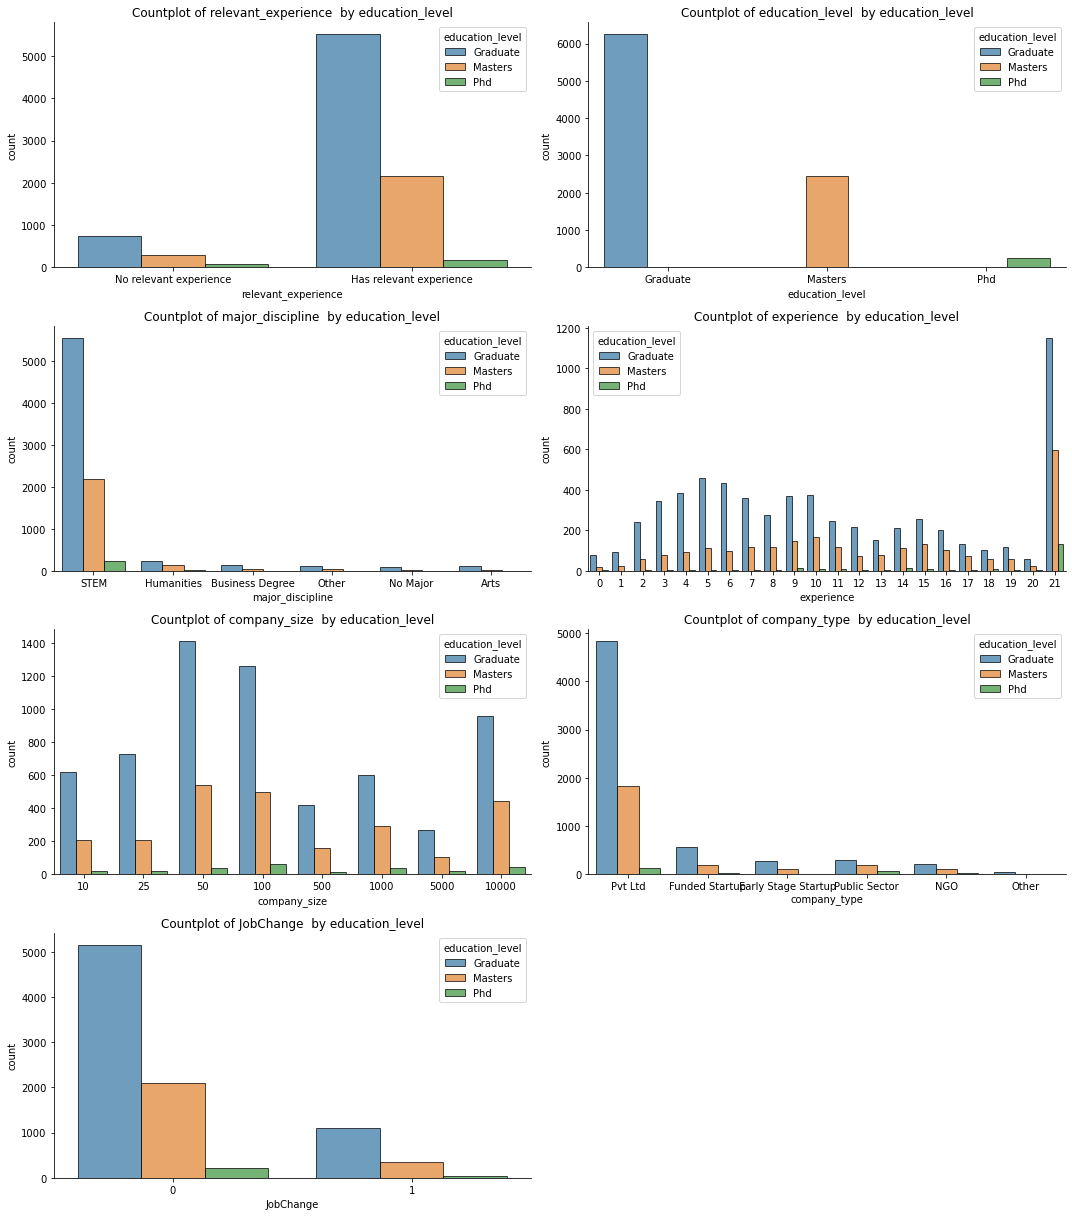

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to education level 
plt.figure(figsize=[15,17])
plot=["relevant_experience", "education_level","major_discipline", "experience","company_size","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_HRData)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## Exploratory Data Analysis - 2 with respect to Job Change

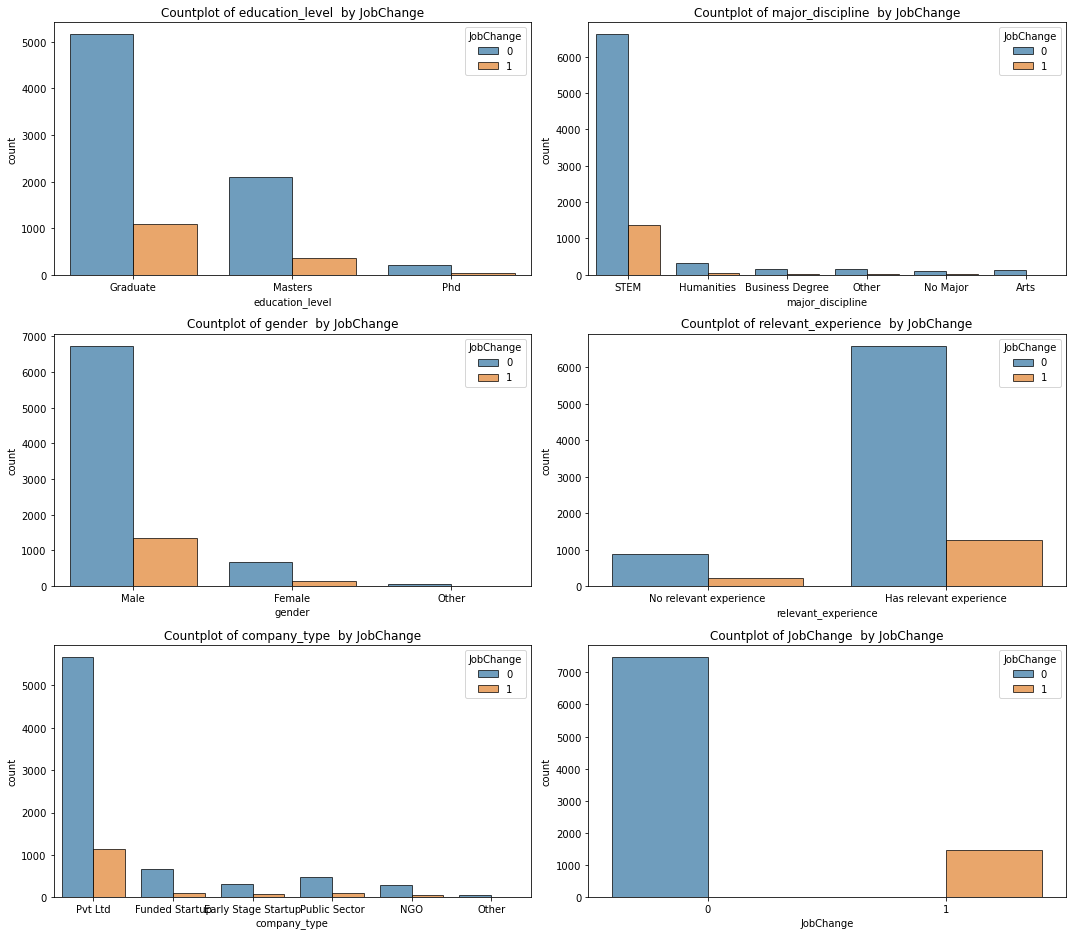

In [16]:
# Exploratory Data Analysis - 2
import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to JobChange
plt.figure(figsize=[15,17])
plot=[ "education_level","major_discipline", "gender","relevant_experience","company_type", "JobChange"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='JobChange', edgecolor="black", alpha=0.7, data=df_HRData)
    #sns.despine()
    plt.title("Countplot of {}  by JobChange".format(f))
    n=n+1
plt.tight_layout()
plt.show()

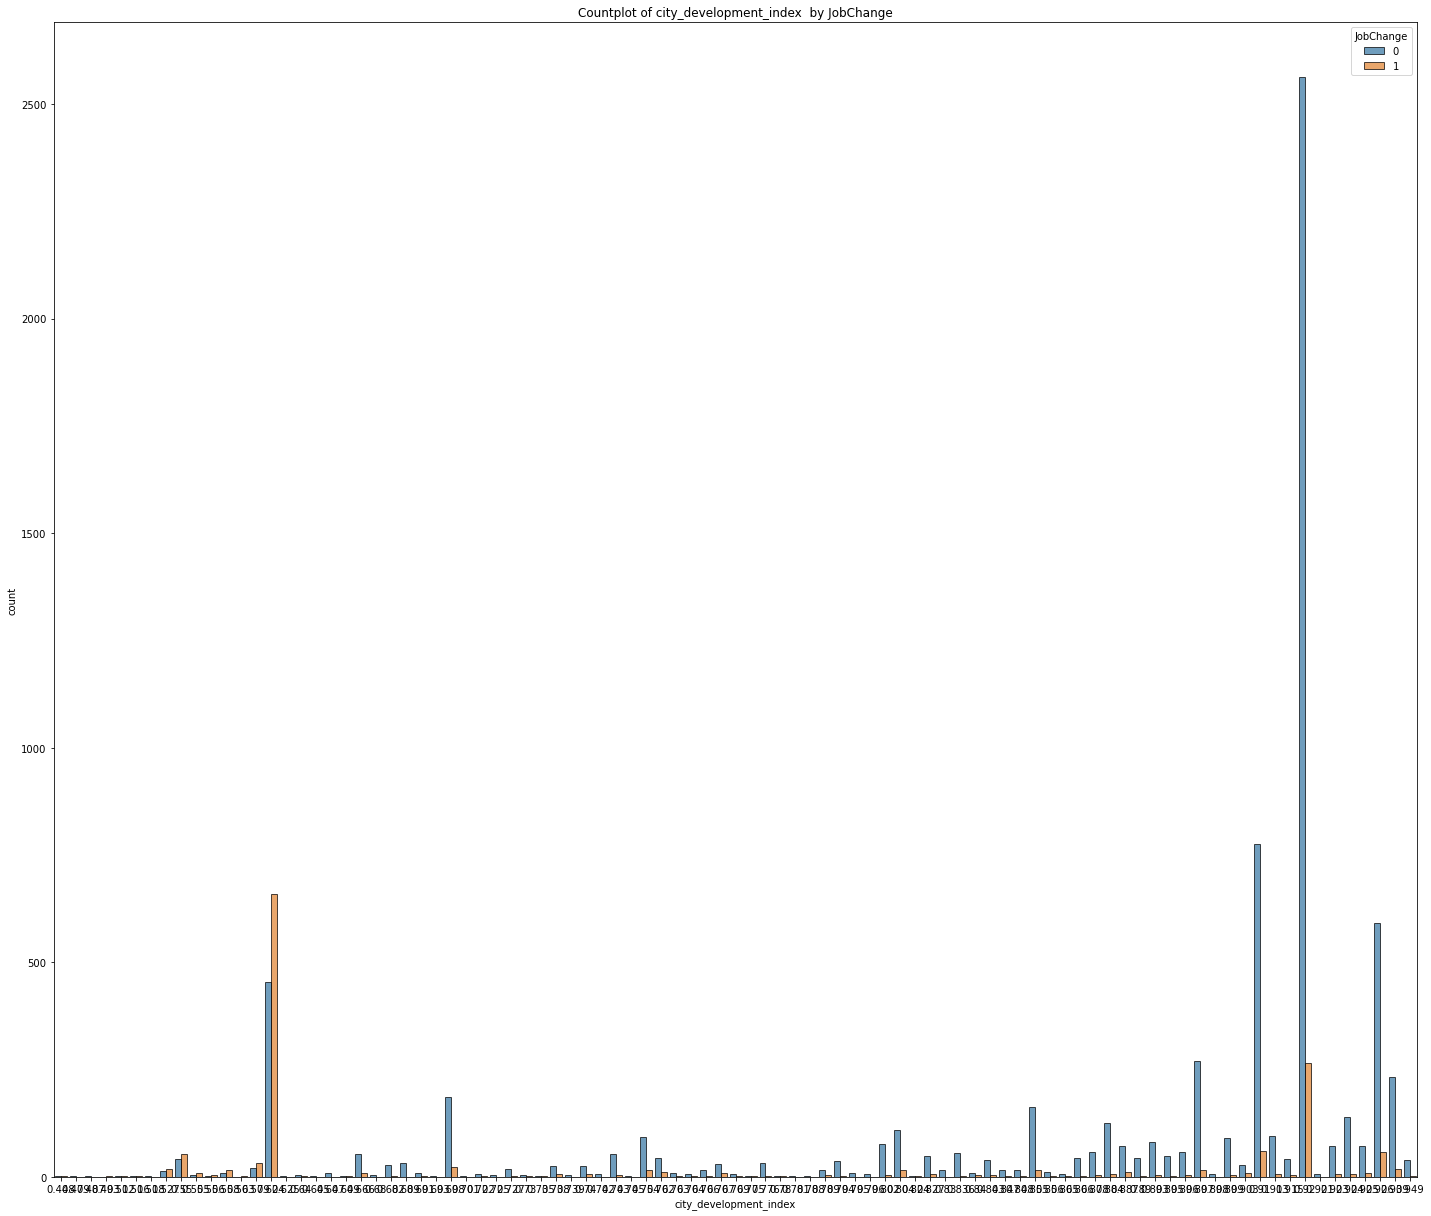

In [17]:
# Exploratory Data Analysis - 3 ( CITY DEV INDEX vs JOB CHANGE)
import matplotlib.pyplot as plt
import seaborn as sns
#Countplots showing the frequency of each category with respect to JobChange
plt.figure(figsize=[20,17])
plot=["city_development_index"]
n=1
for f in plot:
    #plt.subplot(4,2,n)
    sns.countplot(x=f, hue='JobChange', edgecolor="black", alpha=0.7, data=df_HRData)
    #sns.despine()
    plt.title("Countplot of {}  by JobChange".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()

In [19]:
df_HRData.city = le.fit_transform(df_HRData.city)
df_HRData.gender = le.fit_transform(df_HRData.gender)
df_HRData.relevant_experience = le.fit_transform(df_HRData.relevant_experience)
df_HRData.enrolled_university = le.fit_transform(df_HRData.enrolled_university)
df_HRData.education_level = le.fit_transform(df_HRData.education_level)
df_HRData.major_discipline = le.fit_transform(df_HRData.major_discipline)
df_HRData.company_type = le.fit_transform(df_HRData.company_type)
df_HRData.last_new_job = le.fit_transform(df_HRData.last_new_job)

In [20]:
df_HRData.dtypes

city                        int32
city_development_index    float64
gender                      int32
relevant_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int64
company_size                int64
company_type                int32
last_new_job                int64
training_hours              int64
JobChange                   int64
dtype: object

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X = df_HRData.iloc[:, : -1]
y = df_HRData.JobChange
X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.40, random_state=35)
print(y_test.unique())
print(y_train.unique())

[0 1]
[0 1]


In [22]:
X_train

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
13116,60,0.624,1,0,2,1,5,9,100,5,5,96
14404,47,0.920,1,0,2,1,5,21,5000,5,4,26
15492,60,0.624,1,0,2,1,5,21,100,5,2,43
12616,46,0.910,1,0,2,0,5,19,5000,5,2,20
17951,46,0.910,1,0,2,0,5,11,10,5,1,119
...,...,...,...,...,...,...,...,...,...,...,...,...
6984,12,0.926,1,0,2,1,5,11,1000,4,1,22
6278,46,0.910,1,0,2,0,5,6,50,5,3,36
15327,60,0.624,1,1,2,0,5,2,10,5,2,34
2718,5,0.920,1,0,2,0,5,21,25,5,1,80


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
y_predict = model_log.predict(X_test)
y_predict

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
accuracy_score(y_test,y_predict)

0.8396989127404516

In [25]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,3009,2
1,573,3


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3011
           1       0.60      0.01      0.01       576

    accuracy                           0.84      3587
   macro avg       0.72      0.50      0.46      3587
weighted avg       0.80      0.84      0.77      3587



In [28]:
from sklearn.feature_selection import RFE
rfe=RFE(model_log,n_features_to_select=4)
rfe.fit(X_test,y_test)
rfe.ranking_
z_log=pd.DataFrame()
z_log['Features']=X_test.columns
z_log['Importance_Rank']=rfe.ranking_
z_log.index.name='Index'
z_log=z_log.sort_values(ascending=True,by='Importance_Rank')
z_log

C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Features,Importance_Rank
Index,,
1,city_development_index,1
2,gender,1
3,relevant_experience,1
4,enrolled_university,1
5,education_level,2
7,experience,3
10,last_new_job,4
9,company_type,5
6,major_discipline,6


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_predict = model_rf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,2852,159
1,363,213


In [31]:
accuracy_score(y_test,y_predict)        #accuracy has reduced compared to the previous   

0.8544744912182882

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3011
           1       0.57      0.37      0.45       576

    accuracy                           0.85      3587
   macro avg       0.73      0.66      0.68      3587
weighted avg       0.84      0.85      0.84      3587



In [33]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':model_rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
1,city_development_index,0.233773
11,training_hours,0.218058
7,experience,0.138967
0,city,0.109230
8,company_size,0.090246
10,last_new_job,0.066750
9,company_type,0.036441
5,education_level,0.028646
4,enrolled_university,0.025103
2,gender,0.019620


## KNN IMPLEMENTATION

In [34]:
# Trying KNN with K = 3 ( just some K value) 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

print(knn.predict(X_test))
y_predict = knn.predict(X_test)

[0 0 0 ... 0 0 0]


In [35]:
# Find out prediction accuracy
print(knn.score(X_test, y_test))

0.8369110677446334


In [36]:
pd.crosstab(y_test,y_predict)

col_0,0,1
JobChange,,
0,2907,104
1,481,95


In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3011
           1       0.48      0.16      0.25       576

    accuracy                           0.84      3587
   macro avg       0.67      0.57      0.58      3587
weighted avg       0.80      0.84      0.80      3587



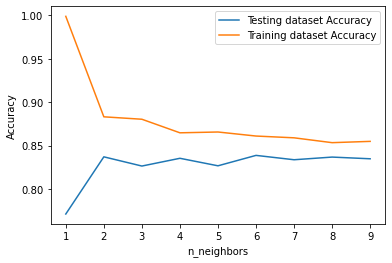

In [38]:
# Trying to find out optimal value of K

import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(knn, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
importance
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03239
Feature: 1, Score: 0.00011
Feature: 2, Score: -0.00017
Feature: 3, Score: -0.00028
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00011
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00296
Feature: 8, Score: -0.00190
Feature: 9, Score: -0.00050
Feature: 10, Score: -0.00156
Feature: 11, Score: -0.00229


## CATEGORICAL NAIVE BAYES

In [40]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train,y_train)

y_pred = cnb.predict(X_test)

In [41]:
# Confusion Matrix and prediction accuracy of CNB
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[2960   51]
 [ 495   81]]
0.8477836632283245


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3011
           1       0.61      0.14      0.23       576

    accuracy                           0.85      3587
   macro avg       0.74      0.56      0.57      3587
weighted avg       0.82      0.85      0.81      3587



In [43]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(cnb, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01333
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00056
Feature: 3, Score: -0.00017
Feature: 4, Score: 0.00190
Feature: 5, Score: 0.00206
Feature: 6, Score: 0.00056
Feature: 7, Score: 0.00535
Feature: 8, Score: 0.00162
Feature: 9, Score: 0.00061
Feature: 10, Score: 0.00173
Feature: 11, Score: 0.00195


## RANDOM FOREST WITH SMOTE

In [46]:
import collections
target_count = collections.Counter(y_train_smote)
print('no of 0 in y_train_smote :',target_count[0])
print('no of 1 in y_train_smote :',target_count[1]) 

model_rf_smote = RandomForestClassifier(n_estimators=200)
model_rf_smote.fit(X_train_smote,y_train_smote)
y_predict = model_rf_smote.predict(X_test)

no of 0 in y_train_smote : 4468
no of 1 in y_train_smote : 4468


In [48]:
accuracy_score(y_test,y_predict)        
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3011
           1       0.46      0.49      0.48       576

    accuracy                           0.83      3587
   macro avg       0.68      0.69      0.69      3587
weighted avg       0.83      0.83      0.83      3587

